<a href="https://colab.research.google.com/github/EnilaLeme/An-lise---Saresp/blob/main/Estudo_Saresp_2011_2018_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fonte: https://www.kaggle.com/tiagodatascience/notas-saresp

In [ ]:
# Bibliotecas:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
# Importando o arquivo:
ed = pd.read_csv('sarespv1.csv')

In [ ]:
# Visualizando as primeiras linhas:
ed.head()

,DEPADM,DepBol,NomeDepBol,codRMet,CODESC,NOMESC,SERIE_ANO,cod_per,periodo,co_comp,ds_comp,medprof,arquivo,classification
0,1,1,Rede Estadual,1,24,GAVIAO PEIXOTO BRIGADEIRO ...,3º Ano EF,2,TARDE,2,MATEMÁTICA,173.8,2016-01-01,Básico
1,1,1,Rede Estadual,1,24,GAVIAO PEIXOTO BRIGADEIRO ...,3º Ano EF,9,GERAL,2,MATEMÁTICA,173.8,2016-01-01,Básico
2,1,1,Rede Estadual,1,61,SUZANA DE CAMPOS DONA ...,3º Ano EF,1,MANHA,2,MATEMÁTICA,184.8,2016-01-01,Adequado
3,1,1,Rede Estadual,1,61,SUZANA DE CAMPOS DONA ...,3º Ano EF,9,GERAL,2,MATEMÁTICA,184.8,2016-01-01,Adequado
4,1,1,Rede Estadual,1,73,JULIO DE FARIA E SOUZA PROFESSOR ...,3º Ano EF,1,MANHA,2,MATEMÁTICA,181.4,2016-01-01,Adequado


In [ ]:
# Nome das colunas: 
ed.columns

Index(['DEPADM', 'DepBol', 'NomeDepBol', 'codRMet', 'CODESC', 'NOMESC',
       'SERIE_ANO', 'cod_per', 'periodo', 'co_comp', 'ds_comp', 'medprof',
       'arquivo', 'classification'],
      dtype='object')

In [ ]:
# Informações da base:
ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409210 entries, 0 to 409209
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DEPADM          409210 non-null  int64  
 1   DepBol          409210 non-null  int64  
 2   NomeDepBol      409210 non-null  object 
 3   codRMet         409210 non-null  object 
 4   CODESC          409210 non-null  int64  
 5   NOMESC          409210 non-null  object 
 6   SERIE_ANO       409210 non-null  object 
 7   cod_per         409210 non-null  int64  
 8   periodo         409210 non-null  object 
 9   co_comp         409210 non-null  int64  
 10  ds_comp         409210 non-null  object 
 11  medprof         407099 non-null  float64
 12  arquivo         409210 non-null  object 
 13  classification  407095 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 43.7+ MB


In [ ]:
# Estatísticas da base:
ed.describe()

,DEPADM,DepBol,CODESC,cod_per,co_comp,medprof
count,409210.0,409210.0,409210.000000,409210.000000,409210.000000,407099.000000
mean,1.0,1.0,275757.987161,5.045708,1.500000,240.300120
std,0.0,0.0,392798.455364,3.696578,0.500001,32.404607
min,1.0,1.0,12.000000,1.000000,1.000000,73.200000
25%,1.0,1.0,16329.000000,1.000000,1.000000,216.600000
50%,1.0,1.0,35452.000000,3.000000,1.500000,241.000000
75%,1.0,1.0,901507.000000,9.000000,2.000000,265.100000
max,1.0,1.0,926103.000000,9.000000,2.000000,412.900000


In [ ]:
# Verificando valores distintos:
ed['DEPADM'].unique()

array([1], dtype=int64)

In [ ]:
ed['DepBol'].unique()

array([1], dtype=int64)

In [ ]:
ed['NomeDepBol'].unique()

array(['Rede Estadual'], dtype=object)

In [ ]:
ed['codRMet'].unique()

array(['1', '2', '3', '4', '5', '7', '6', 'Unknow'], dtype=object)

In [ ]:
ed['SERIE_ANO'].unique()

array(['3º Ano EF', '5º Ano EF', '7º Ano EF', '9º Ano EF', 'EM-3ª série'],
      dtype=object)

In [ ]:
ed['periodo'].unique()

array(['TARDE', 'GERAL', 'MANHA', 'NOITE'], dtype=object)

In [ ]:
ed['co_comp'].unique()

array([2, 1], dtype=int64)

In [ ]:
ed['ds_comp'].unique()

array(['MATEMÁTICA', 'LÍNGUA PORTUGUESA'], dtype=object)

In [ ]:
ed['classification'].unique()

array(['Básico', 'Adequado', 'Avançado', 'Abaixo do Básico', nan],
      dtype=object)

In [ ]:
# Verificando quantos estudantes foram classificados em cada uma das categorias: Básico, Adequado, Abaixo do Básico, Avançado:
ed['classification'].value_counts()

Básico              301872
Adequado             83833
Abaixo do Básico     13427
Avançado              7963
Name: classification, dtype: int64

In [ ]:
# Verificando quantos estudantes fizeram/foram cadastrados para o Saresp em cada ano:
ed['arquivo'].value_counts()

2011-01-01    59126
2012-01-01    58598
2013-01-01    57668
2014-01-01    55760
2015-01-01    54828
2016-01-01    54700
2017-01-01    48148
2018-01-01    20382
Name: arquivo, dtype: int64

In [ ]:
# Escolhendo as colunas que serão utilizadas para análise:
edu = ed.loc[:,['NOMESC', 'SERIE_ANO', 'periodo', 'ds_comp', 'arquivo', 'classification']]
edu.head()

,NOMESC,SERIE_ANO,periodo,ds_comp,arquivo,classification
0,GAVIAO PEIXOTO BRIGADEIRO ...,3º Ano EF,TARDE,MATEMÁTICA,2016-01-01,Básico
1,GAVIAO PEIXOTO BRIGADEIRO ...,3º Ano EF,GERAL,MATEMÁTICA,2016-01-01,Básico
2,SUZANA DE CAMPOS DONA ...,3º Ano EF,MANHA,MATEMÁTICA,2016-01-01,Adequado
3,SUZANA DE CAMPOS DONA ...,3º Ano EF,GERAL,MATEMÁTICA,2016-01-01,Adequado
4,JULIO DE FARIA E SOUZA PROFESSOR ...,3º Ano EF,MANHA,MATEMÁTICA,2016-01-01,Adequado


In [ ]:
# Alterando a coluna "arquivo" para o formato de data e fazendo a verificação:
edu['arquivo'] = pd.to_datetime(edu['arquivo'])
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409210 entries, 0 to 409209
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   NOMESC          409210 non-null  object        
 1   SERIE_ANO       409210 non-null  object        
 2   periodo         409210 non-null  object        
 3   ds_comp         409210 non-null  object        
 4   arquivo         409210 non-null  datetime64[ns]
 5   classification  407095 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 18.7+ MB


In [ ]:
# Verificando se temos dados nulos para tratar:
edu.isnull().sum()

NOMESC               0
SERIE_ANO            0
periodo              0
ds_comp              0
arquivo              0
classification    2115
dtype: int64

Text(0, 0.5, 'Quantidade')

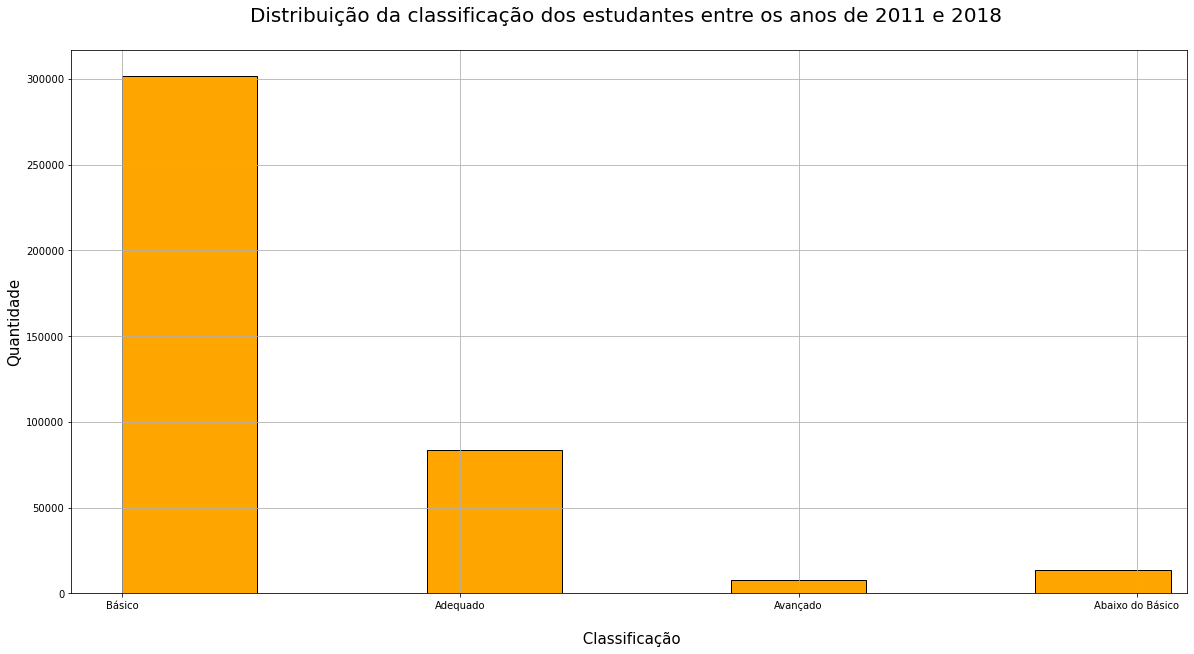

In [ ]:
# Plotando o histograma com o total de alunos em cada uma das categorias: Básico, Adequado, Abaixo do Básico, Avançado:
plt.figure(figsize = (20,10))
edu['classification'].hist(color='orange', edgecolor = 'black', width = 0.4)
plt.title("Distribuição da classificação dos estudantes entre os anos de 2011 e 2018 \n", fontsize = 20)
plt.xlabel("\n Classificação", fontsize = 15)
plt.ylabel("Quantidade", fontsize = 15)

In [ ]:
# Agora, vamos colocar em uma linha do tempo, como os estudamtes foram classificados:

# Primeiramente, agrupando os dados:
agrupado = edu.groupby(['arquivo', 'classification'])['classification'].count()
agrupado = pd.DataFrame(agrupado)
agrupado.head()

classification
arquivo    classification                  
2011-01-01 Abaixo do Básico            1781
           Adequado                    7851
           Avançado                     310
           Básico                     49184
2012-01-01 Abaixo do Básico            1834

In [ ]:
# Renomeando a coluna:
agrupado.columns = ['Classificação']

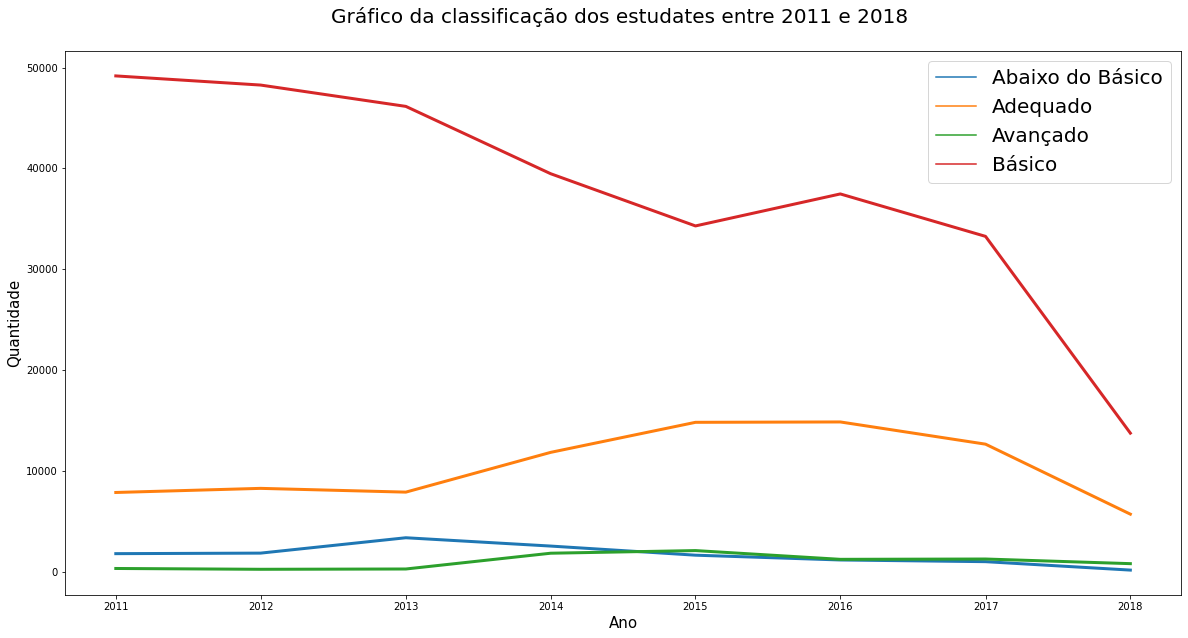

In [ ]:
# Gráfico:
plt.figure(figsize = (20,10))
sns.lineplot(x = "arquivo", y = "Classificação", data = agrupado, hue = 'classification', lw = 3)

plt.title('Gráfico da classificação dos estudates entre 2011 e 2018 \n', fontsize = 20)
plt.xlabel('Ano', fontsize = 15)
plt.ylabel('Quantidade', fontsize = 15)
plt.legend(fontsize = 20)
plt.show()

In [ ]:
# O número de estudantes nos níveis "Básico" e "Abaixo do Básico" diminuiu
# Portanto, as outras duas categorias "Adequado" e "Avançado" deveriam aumentar
# Ou, pelo menos uma delas deveria aumentar consideravelmente
# Mas o que ocorre é que o número de estudantes no nível "Adequado" também diminuiu
# E no nível "Avançado" aumentou pouco nos últimos anos
# Dessa forma, é necessário fazer um estudo mais profundo desses dados
# Para saber se o número de estudantes que tem realizado a prova é o mesmo em todos os anos

In [ ]:
# Verificando a classificação dos estudantes no ano de 2011:
edu_2011 = edu.loc[:, ['classification']][edu.loc[:,'arquivo'] == '01-01-2011']
edu_2011.head()

,classification
38293,Básico
38294,Básico
38295,Básico
38296,Adequado
38297,Adequado


In [ ]:
# Verificando se todos os alunos de 2011 estão classificados em uma das categorias:
edu_2011['classification'].isnull().sum()

0

In [ ]:
# Total de alunos em 2011:
len(edu_2011['classification'])

59126

In [ ]:
# Fazendo a mesma investigação para os demais anos:

edu_2012 = edu.loc[:, ['classification']][edu.loc[:,'arquivo'] == '01-01-2012']
edu_2012['classification'].isnull().sum()

0

In [ ]:
len(edu_2012['classification'])

58598

In [ ]:
edu_2013 = edu.loc[:, ['classification']][edu.loc[:,'arquivo'] == '01-01-2013']
n = edu_2013['classification'].isnull().sum()
n

4

In [ ]:
len(edu_2013['classification']) - n

57664

In [ ]:
edu_2014 = edu.loc[:, ['classification']][edu.loc[:,'arquivo'] == '01-01-2014']
n = edu_2014['classification'].isnull().sum()
n

92

In [ ]:
len(edu_2014['classification']) - n

55668

In [ ]:
edu_2015 = edu.loc[:, ['classification']][edu.loc[:,'arquivo'] == '01-01-2015']
n = edu_2015['classification'].isnull().sum()
n

2003

In [ ]:
len(edu_2015['classification']) - n

52825

In [ ]:
edu_2016 = edu.loc[:, ['classification']][edu.loc[:,'arquivo'] == '01-01-2016']
n = edu_2016['classification'].isnull().sum()
n

7

In [ ]:
len(edu_2016['classification']) - n

54693

In [ ]:
edu_2017 = edu.loc[:, ['classification']][edu.loc[:,'arquivo'] == '01-01-2017']
n = edu_2017['classification'].isnull().sum()
n

5

In [ ]:
len(edu_2017['classification']) - n

48144

In [ ]:
edu_2018 = edu.loc[:, ['classification']][edu.loc[:,'arquivo'] == '01-01-2018']
n = edu_2018['classification'].isnull().sum()
n

4

In [ ]:
len(edu_2018['classification']) - n

20378

In [ ]:
# Portanto, temos que o total de estudantes que foram classificados em um dos níveis é:

# 2011 --- 59126
# 2012 --- 58598
# 2013 --- 57664
# 2014 --- 55668
# 2015 --- 52825
# 2016 --- 54693
# 2017 --- 48144
# 2018 --- 20378

# Ou seja, o número de estudantes que fizeram o Saresp foi diminuindo ao longo dos anos
# O que explica a dúvida que surgiu na análise do gráfico


In [ ]:
# Um olhar específico para a área de Matemática:
edu_mat = edu.loc[:,:][edu.loc[:,'ds_comp'] == 'MATEMÁTICA']
edu_mat.head()

,NOMESC,SERIE_ANO,periodo,ds_comp,arquivo,classification
0,GAVIAO PEIXOTO BRIGADEIRO ...,3º Ano EF,TARDE,MATEMÁTICA,2016-01-01,Básico
1,GAVIAO PEIXOTO BRIGADEIRO ...,3º Ano EF,GERAL,MATEMÁTICA,2016-01-01,Básico
2,SUZANA DE CAMPOS DONA ...,3º Ano EF,MANHA,MATEMÁTICA,2016-01-01,Adequado
3,SUZANA DE CAMPOS DONA ...,3º Ano EF,GERAL,MATEMÁTICA,2016-01-01,Adequado
4,JULIO DE FARIA E SOUZA PROFESSOR ...,3º Ano EF,MANHA,MATEMÁTICA,2016-01-01,Adequado


Text(0, 0.5, 'Quantidade')

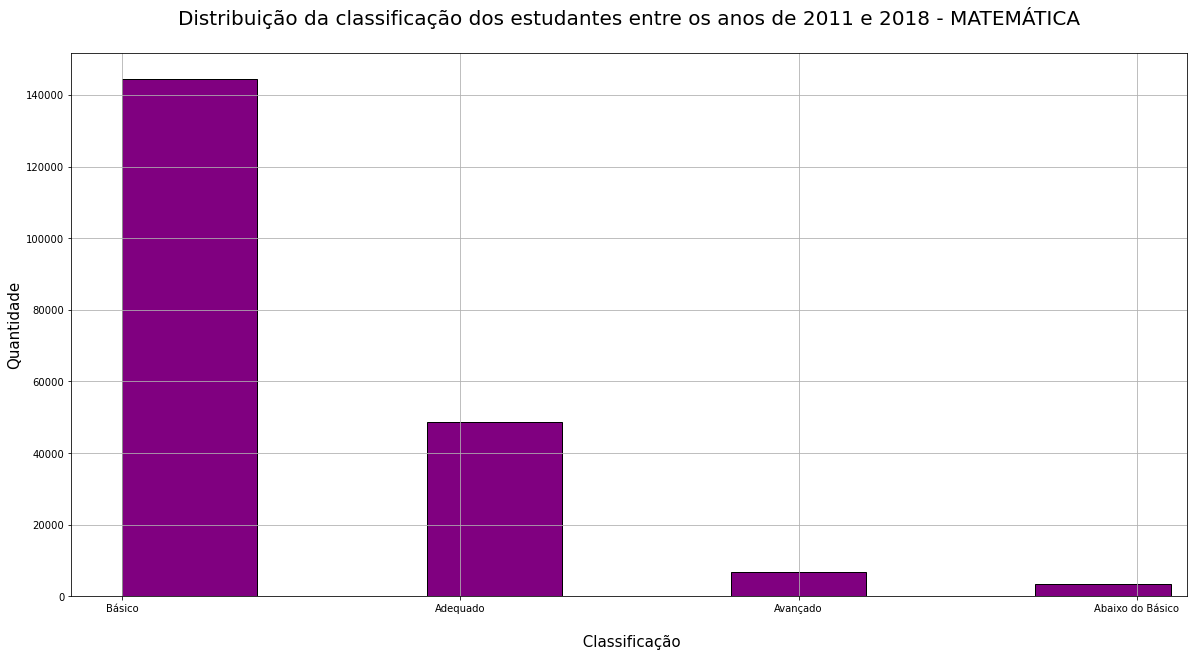

In [ ]:
# Plotando o histograma com o total de alunos em cada uma das categorias na área de Matemática:
plt.figure(figsize = (20,10))
edu_mat['classification'].hist(color = 'purple', edgecolor = 'black', width = 0.4)
plt.title("Distribuição da classificação dos estudantes entre os anos de 2011 e 2018 - MATEMÁTICA\n", fontsize = 20)
plt.xlabel("\n Classificação", fontsize = 15)
plt.ylabel("Quantidade", fontsize = 15)

In [ ]:
# Agrupando os dados da Matemática para geração de gráfico de linhas:
agrupado_mat = edu_mat.groupby(['arquivo', 'classification'])['classification'].count()
agrupado_mat = pd.DataFrame(agrupado_mat)
agrupado_mat.head()

classification
arquivo    classification                  
2011-01-01 Abaixo do Básico             362
           Adequado                    5260
           Avançado                     270
           Básico                     23671
2012-01-01 Abaixo do Básico             622

In [ ]:
# Renomeando a coluna:
agrupado_mat.columns = ['Classificação']

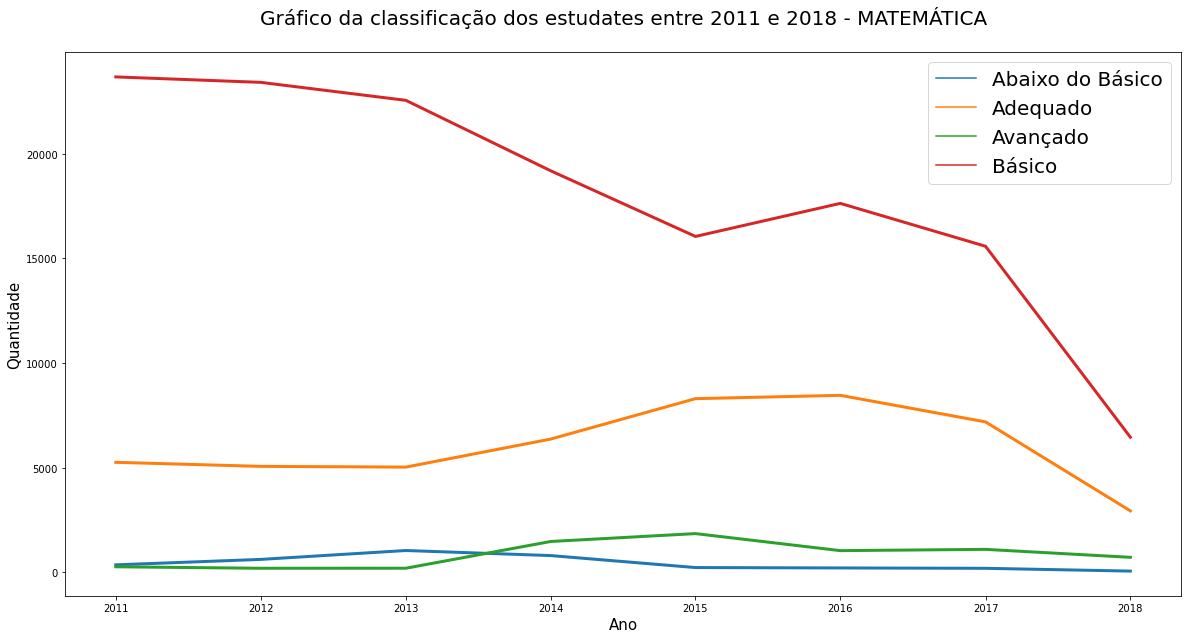

In [ ]:
# Gráfico de linhas da Matemática:

plt.figure(figsize = (20,10))
sns.lineplot(x = "arquivo", y = "Classificação", data = agrupado_mat, hue = 'classification', lw = 3)

plt.title('Gráfico da classificação dos estudates entre 2011 e 2018 - MATEMÁTICA\n', fontsize = 20)
plt.xlabel('Ano', fontsize = 15)
plt.ylabel('Quantidade', fontsize = 15)
plt.legend(fontsize = 20)
plt.show()

In [ ]:
# Um olhar específico para o componente curricular de Língua Portuguesa:
edu_lp = edu.loc[:,:][edu.loc[:,'ds_comp'] == 'LÍNGUA PORTUGUESA']
edu_lp.head()

,NOMESC,SERIE_ANO,periodo,ds_comp,arquivo,classification
204605,GAVIAO PEIXOTO BRIGADEIRO ...,3º Ano EF,TARDE,LÍNGUA PORTUGUESA,2016-01-01,Básico
204606,GAVIAO PEIXOTO BRIGADEIRO ...,3º Ano EF,GERAL,LÍNGUA PORTUGUESA,2016-01-01,Básico
204607,SUZANA DE CAMPOS DONA ...,3º Ano EF,MANHA,LÍNGUA PORTUGUESA,2016-01-01,Básico
204608,SUZANA DE CAMPOS DONA ...,3º Ano EF,GERAL,LÍNGUA PORTUGUESA,2016-01-01,Básico
204609,JULIO DE FARIA E SOUZA PROFESSOR ...,3º Ano EF,MANHA,LÍNGUA PORTUGUESA,2016-01-01,Básico


Text(0, 0.5, 'Quantidade')

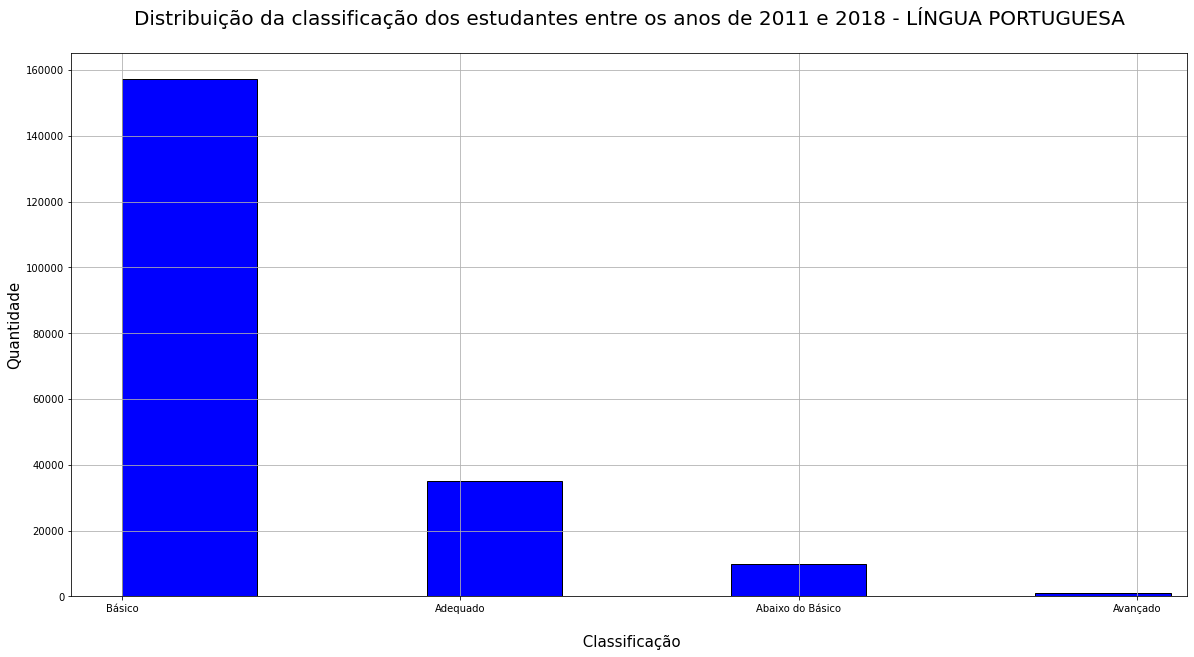

In [ ]:
plt.figure(figsize = (20,10))
edu_lp['classification'].hist(color = 'blue', edgecolor = 'black', width = 0.4)
plt.title("Distribuição da classificação dos estudantes entre os anos de 2011 e 2018 - LÍNGUA PORTUGUESA\n", fontsize = 20)
plt.xlabel("\n Classificação", fontsize = 15)
plt.ylabel("Quantidade", fontsize = 15)

In [ ]:
agrupado_lp = edu_lp.groupby(['arquivo', 'classification'])['classification'].count()
agrupado_lp = pd.DataFrame(agrupado_lp)
agrupado_lp.head()

classification
arquivo    classification                  
2011-01-01 Abaixo do Básico            1419
           Adequado                    2591
           Avançado                      40
           Básico                     25513
2012-01-01 Abaixo do Básico            1212

In [ ]:
agrupado_lp.columns = ['Classificação']

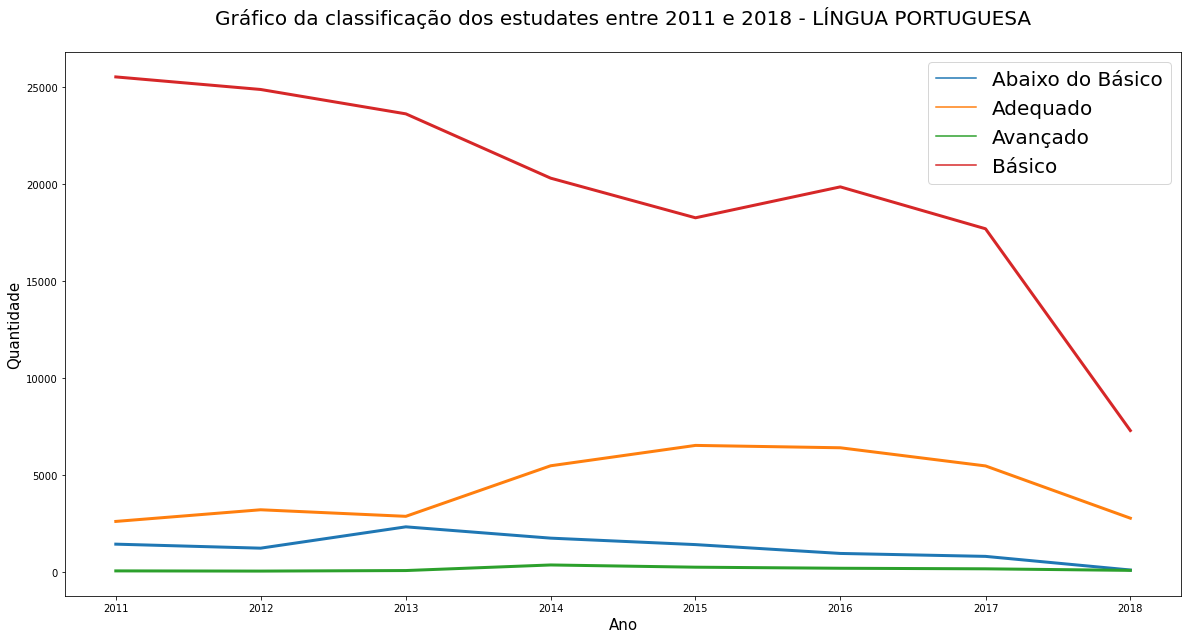

In [ ]:
plt.figure(figsize = (20,10))
sns.lineplot(x = "arquivo", y = "Classificação", data = agrupado_lp, hue = 'classification', lw = 3)

plt.title('Gráfico da classificação dos estudates entre 2011 e 2018 - LÍNGUA PORTUGUESA\n', fontsize = 20)
plt.xlabel('Ano', fontsize = 15)
plt.ylabel('Quantidade', fontsize = 15)
plt.legend(fontsize = 20)
plt.show()

In [ ]:
# O estudo pode ser ainda mais aprofundado por:
# ano, série, período, em percentual, comparando-se os resultados de Matemática e Língua Portuguesa
# Mas já se pode ter uma ideia de que esses resultados precisam melhorar
# Como?